In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
def get_right_image(color_image, depth_image):
    # Basic information
    focal_length = 619  # f_x = 620.070, f_y = 618.210
    baseline = 10  # 10mm
    right_image = np.zeros_like(color_image)

    # Calculate the right image
    for row in range(color_image.shape[0]):
        for col in range(color_image.shape[1]):
            depth = depth_image[row, col]  # mm
            if depth:
                disparity = focal_length * baseline // depth
                
                if (col - disparity > 0):
                    right_image[row, col - disparity] = color_image[row, col]
    return right_image

In [3]:
# Read images
color_images = []
depth_images = []

color_frame_start = 484
depth_frame_start = 213
quantity = 1
for i in range(quantity):
    color_image = cv2.imread("color_frames/color_image" + str(color_frame_start+i) + ".png", cv2.IMREAD_COLOR)
    color_images.append(color_image)

for j in range(quantity):
    depth_image = cv2.imread("depth_frames/depth_image" + str(depth_frame_start+j) + ".png", cv2.IMREAD_UNCHANGED)
    depth_images.append(depth_image)

    max = depth_image.max()
    ratio = 255/max
    depth_image_gray = depth_image * ratio
    cv2.imwrite("depth_frames_gray/depth_image_gray" + str(depth_frame_start+j) + ".png", depth_image_gray)
    
print(len(color_images))
print(len(depth_images))

1
1


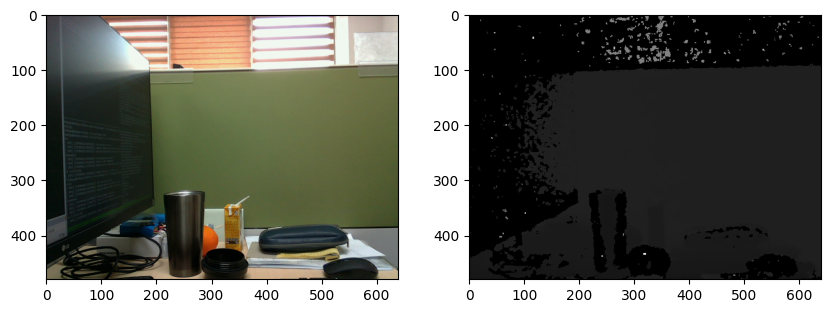

In [4]:
color_image = color_images[0]
depth_image = depth_images[0]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
axs[1].imshow(depth_image, cmap='gray')
plt.show()

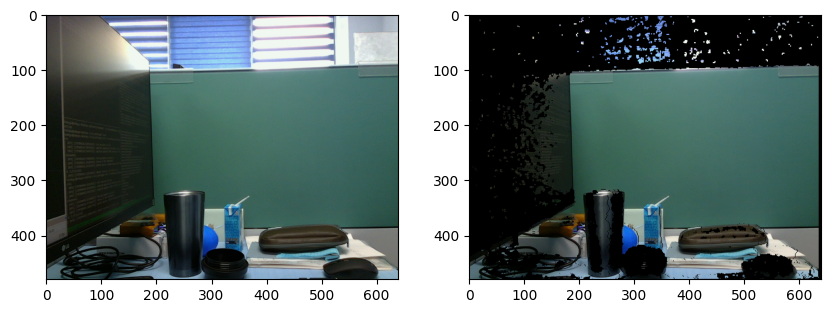

In [5]:
right_image = get_right_image(color_image, depth_image)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(color_image)
axs[1].imshow(right_image)
plt.show()

In [10]:
for i in range(quantity):
    left_image = color_images[i]
    depth_image = depth_images[i]
    right_image = get_right_image(left_image, depth_image)

    right_image_name = "right_frames/right_image" + str(color_frame_start + i) + ".png"
    if cv2.imwrite(right_image_name, right_image):
        print(right_image_name)
    else :
        print("fail")


right_frames/right_image484.png
